# Modelling 1 Exercise
# Regression Challenge

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [3]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [4]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

def getHour(x):
    dt = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return int(dt.hour)
    

oe = OrdinalEncoder()
df[['weather_main']] = oe.fit_transform(df[['weather_main']])
df[['holiday']]= oe.fit_transform(df[['holiday']])
df[['clouds_all']]  = oe.fit_transform(df[['clouds_all']])
df[['weather_description']] = oe.fit_transform(df[['weather_description']])

df.head()

df2 = df['date_time']
hour = list(range(0, len(df2)))
for i in range(0,len(df2)): 
    hour[i] = getHour(df2[i])
#print(getHour('2019-10-31 12:00:00'))

df['hour'] = hour
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,7.0,288.28,0.0,0.0,19.0,1.0,24.0,2012-10-02 09:00:00,5545,9
1,7.0,289.36,0.0,0.0,38.0,1.0,2.0,2012-10-02 10:00:00,4516,10
2,7.0,289.58,0.0,0.0,51.0,1.0,19.0,2012-10-02 11:00:00,4767,11
3,7.0,290.13,0.0,0.0,51.0,1.0,19.0,2012-10-02 12:00:00,5026,12
4,7.0,291.14,0.0,0.0,38.0,1.0,2.0,2012-10-02 13:00:00,4918,13


In [18]:
print(df['holiday'].unique())
print(df['weather_main'].unique())

[ 7.  1. 10.  9.  0.  6. 11.  5.  2.  8.  3.  4.]
[ 1.  0.  6.  2.  5.  4.  3. 10.  8.  9.  7.]


                      holiday      temp   rain_1h   snow_1h  clouds_all  \
holiday              1.000000 -0.000472  0.000066  0.000432    0.006558   
temp                -0.000472  1.000000  0.009069 -0.019755   -0.111289   
rain_1h              0.000066  0.009069  1.000000 -0.000090    0.004115   
snow_1h              0.000432 -0.019755 -0.000090  1.000000    0.029213   
clouds_all           0.006558 -0.111289  0.004115  0.029213    1.000000   
weather_main        -0.004317 -0.033441  0.009535  0.036637    0.505663   
weather_description -0.002712 -0.049434  0.010774  0.005101   -0.322787   
traffic_volume       0.018676  0.130299  0.004714  0.000733    0.061582   
hour                 0.026040  0.112089  0.003421  0.009849    0.051006   

                     weather_main  weather_description  traffic_volume  \
holiday                 -0.004317            -0.002712        0.018676   
temp                    -0.033441            -0.049434        0.130299   
rain_1h                  0.

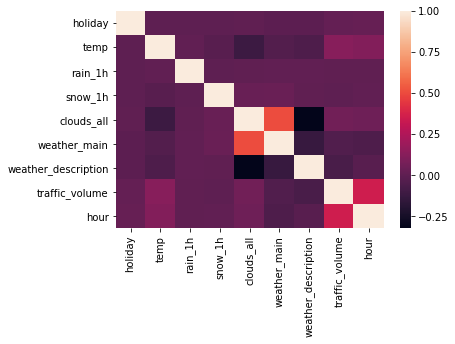

In [6]:
import seaborn as sns

cr = df.corr()
print(cr)

sns.heatmap(cr)

In [11]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

att = ['holiday','temp', 'rain_1h', 'snow_1h','clouds_all','weather_main','weather_description','hour']
X = df[['holiday','temp', 'rain_1h', 'snow_1h','clouds_all','weather_main','weather_description','hour']]
Y = df['traffic_volume']

modelnames = ['Multiple Linear Regression','SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
models = [LinearRegression(), SVR(kernel='rbf'), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=25, max_depth=50)]
rmse = [0,0,0,0]
mse = [0,0,0,0]
r2s = [0,0,0,0]

for i in range(0,len(models)):
    models[i].fit(X,Y)
    Yp = models[i].predict(X)
    mse[i] = mean_squared_error(Y,Yp)
    rmse[i] = np.sqrt(mse[i])
    r2s[i]  = r2_score(Y,Yp)
    
print(modelnames)
print(mse)
print(rmse)
print(r2s)


/home/anwar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['Multiple Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']
[3394758.2872325173, 3696022.328829898, 22914.635665238216, 150406.31735275505]
[1842.4869842776413, 1922.5041817457507, 151.37580937930016, 387.82253332259467]
[0.14003051587106619, 0.06371348222143236, 0.994195201618286, 0.9618986589914105]


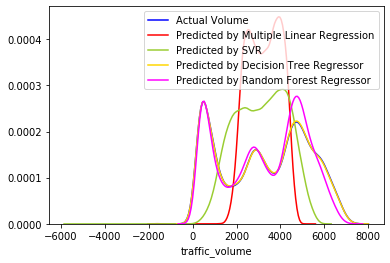

In [8]:
ax1 = sns.distplot(df['traffic_volume'], hist=False, color='b', label='Actual Volume')
colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    sns.distplot(models[i].predict(X), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)


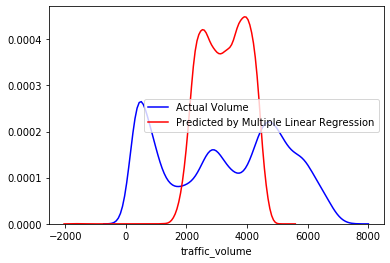

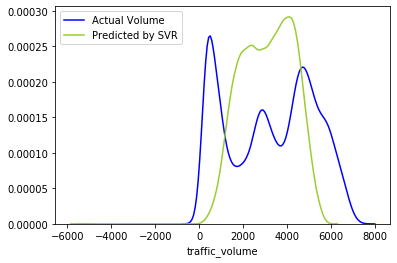

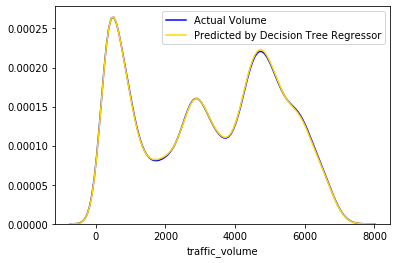

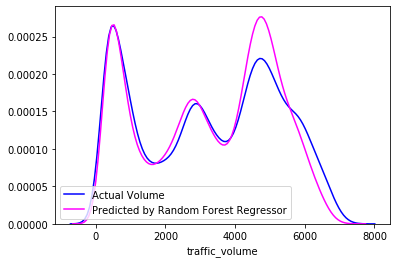

In [10]:
import matplotlib.pyplot as plt

colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    ax1 = sns.distplot(df['traffic_volume'], hist=False, color='b', label='Actual Volume')
    sns.distplot(models[i].predict(X), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)
    plt.show()


['Multiple Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
[3374204.178120956, 1385801.0054325566, 909796.4944575294]
[1836.9006990365472, 1177.2004950018313, 953.8325295656095]
[0.1465302628417252, 0.6494760964587369, 0.7698764704201748]


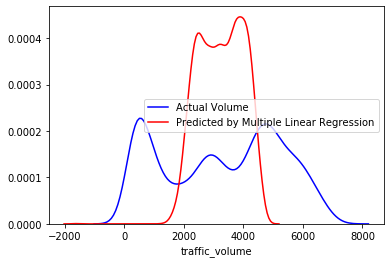

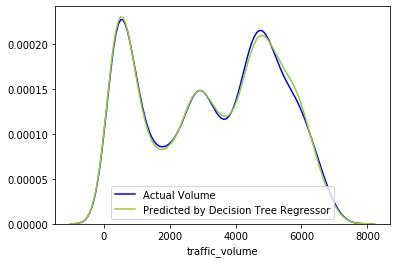

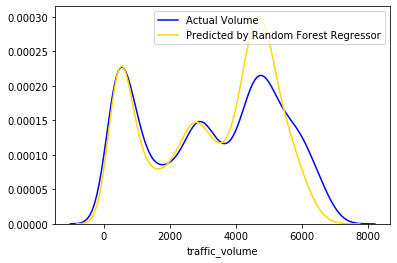

In [27]:
from sklearn.model_selection import train_test_split

#print(df['holiday'].unique())

att = ['holiday','temp', 'clouds_all','weather_main','weather_description','hour']
X = df[['holiday','temp', 'clouds_all','weather_main','weather_description','hour']]
Y = df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

modelnames = ['Multiple Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
models = [LinearRegression(), DecisionTreeRegressor(criterion='friedman_mse', max_depth=100), RandomForestRegressor(n_estimators=100, max_depth=50)]
rmse = [0,0,0]
mse = [0,0,0]
r2s = [0,0,0]

for i in range(0,len(models)):
    models[i].fit(X_train,y_train)
    Yp = models[i].predict(X_test)
    mse[i] = mean_squared_error(y_test,Yp)
    rmse[i] = np.sqrt(mse[i])
    r2s[i]  = r2_score(y_test,Yp)

                               
print(modelnames)
print(mse)
print(rmse)
print(r2s)
                           
colors = ['r','yellowgreen','gold','magenta']
for i in range(0,len(models)):
    ax1 = sns.distplot(y_test, hist=False, color='b', label='Actual Volume')
    sns.distplot(models[i].predict(X_test), hist=False, color=colors[i], label='Predicted by '+modelnames[i], ax=ax1)
    plt.show()


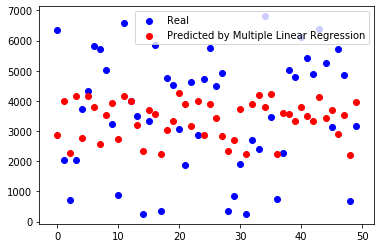

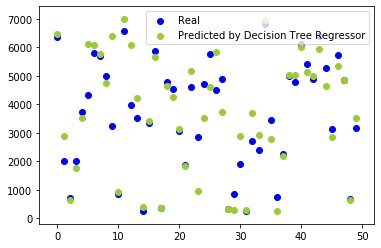

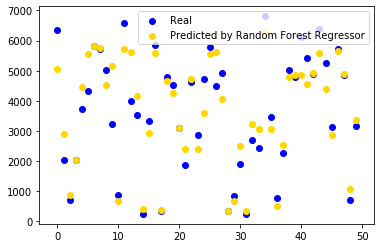

In [40]:

for i in range(0,len(models)):
    plt.figure()
    yp = models[i].predict(X_test[0:50])
    plt.scatter(range(0,50), y_test[0:50], color='blue', label='Real ')
    plt.scatter(range(0,len(yp)), yp, color=colors[i], label='Predicted by '+modelnames[i])
    plt.legend()
    plt.show()

In [36]:
X_test.shape

(9641, 6)